In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *
from fastai.vision.widgets import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.5 MB/s eta 0:00:00
Mounted at /content/gdrive


In [ ]:
path = Path ('/content/gdrive/My Drive/Input')
path.ls

<bound method Path.ls of Path('/content/gdrive/My Drive/Input')>

(540, 540)


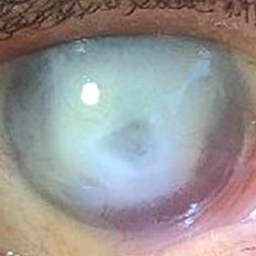

In [ ]:
from PIL import Image
img = Image.open("/content/gdrive/My Drive/Input/Train/CO/Corneal Opacities Edited 960.jpg")
print(img.shape)
img.to_thumb(256,256)

In [ ]:
item_tfms=Resize(256, ResizeMethod.Squish)
item_tfms=Resize(256, ResizeMethod.Pad, pad_mode='zeros')
item_tfms=RandomResizedCrop(256, min_scale=0.3)

In [ ]:
tfms = aug_transforms(do_flip = True, flip_vert = False, mult=2.0)

In [ ]:
data = ImageDataLoaders.from_folder(path,train = "Train", valid_pct = 0.2, item_tfms=Resize(256), batch_tfms=tfms, bs = 30, num_workers = 4)

In [ ]:
Data = DataBlock(blocks=(ImageBlock, CategoryBlock), get_items=get_image_files,splitter=RandomSplitter(valid_pct = 0.2, seed=42), get_y=parent_label,
                 item_tfms=Resize(256))
dls = Data.dataloaders(path)

In [ ]:
len(data.train_ds)

1600

In [ ]:
learn = cnn_learner(data, resnet50, metrics=accuracy)
learn.fine_tune(4)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61

epoch,train_loss,valid_loss,accuracy,time
0,0.886901,0.631852,0.832500,19:36


epoch,train_loss,valid_loss,accuracy,time
0,0.542595,0.460142,0.882500,27:29
1,0.501159,0.264979,0.907500,27:51
2,0.341242,0.187834,0.917500,27:28
3,0.230442,0.191603,0.922500,27:48


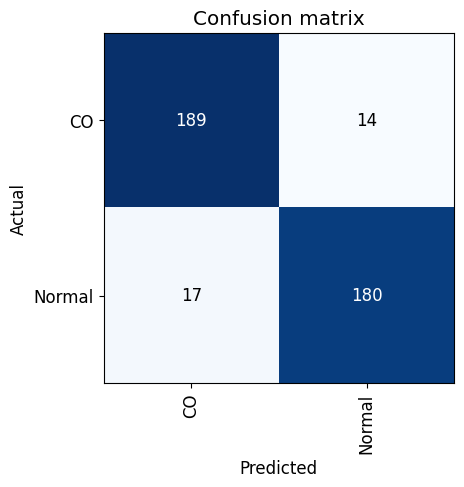

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

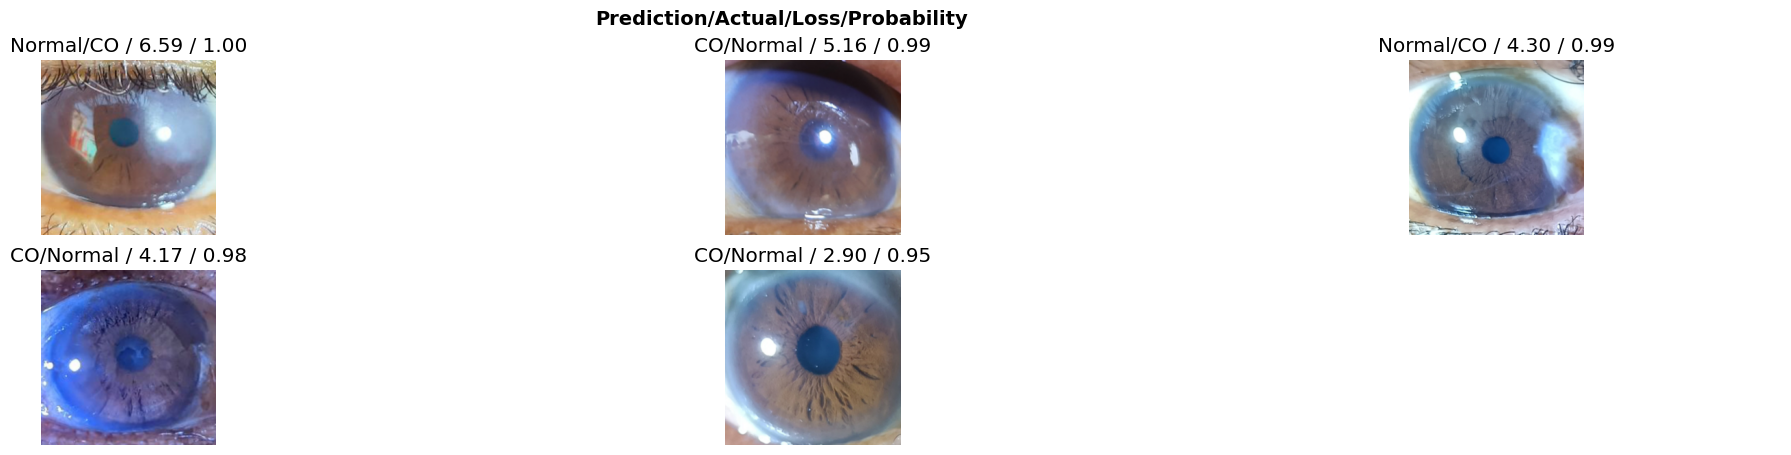

In [ ]:
interp.plot_top_losses(5, nrows=2, figsize = (25,5))

In [ ]:
# from fastai.vision.widgets import *
# cleaner = ImageClassifierCleaner(learn)
# cleaner

In [ ]:
learn.export()

In [ ]:
learn_inf = load_learner('/content/gdrive/My Drive/Input/export.pkl')
learn_inf.predict("/content/gdrive/My Drive/Test/Normal 1027.jpg")

('Normal', tensor(1), tensor([0.4810, 0.5190]))

In [ ]:
# Normal-Normal : 5
# Normal-CO : 1
# CO-CO : 3
# CO-Normal : 1

# 8/10